# Lesson 1 - What's your pet

Welcome to lesson 1! For those of you who are using a Jupyter Notebook for the first time, you can learn about this useful tool in a tutorial we prepared specially for you; click `File`->`Open` now and click `00_notebook_tutorial.ipynb`. 

In this lesson we will build our first image classifier from scratch, and see if we can achieve world-class results. Let's dive in!

Every notebook starts with the following three lines; they ensure that any edits to libraries you make are reloaded here automatically, and also that any charts or images displayed are shown in this notebook.

In [1]:
%reload_ext autoreload
%autoreload 2
%matplotlib inline

In [8]:
from fastai.basic_train import load_learner

In [10]:
from fastai.vision import open_image

We import all the necessary packages. We are going to work with the [fastai V1 library](http://www.fast.ai/2018/10/02/fastai-ai/) which sits on top of [Pytorch 1.0](https://hackernoon.com/pytorch-1-0-468332ba5163). The fastai library provides many useful functions that enable us to quickly and easily build neural networks and train our models.

In [2]:
from fastai.vision import *
from fastai.metrics import error_rate
from fastai.callbacks.oversampling import OverSamplingCallback

In [3]:
import os
import pandas as pd
pd.options.display.max_rows = 999
pd.options.display.max_columns = 999
from cat_detector_tools import get_folder_counts, get_fnames,accuracy_by_class

In [11]:
?? load_learner

In [4]:
import torch

print(f"current gpu device: {torch.cuda.current_device()}")
print(f"device name: {torch.cuda.get_device_name(0)}")
print(f"is cuda available: {torch.cuda.is_available()}")

current gpu device: 0
device name: GeForce GTX 1660
is cuda available: True


If you're using a computer with an unusually small GPU, you may get an out of memory error when running this notebook. If this happens, click Kernel->Restart, uncomment the 2nd line below to use a smaller *batch size* (you'll learn all about what this means during the course), and try again.

In [5]:
bs = 64
# bs = 16   # uncomment this line if you run out of memory even after clicking Kernel->Restart

In [6]:
path = 'C:/Users/leero/Projects/cat-detector/images/'

## Looking at the data

In [7]:
to_keep = [
    'Snowshoe',
    'Domestic Medium Hair',
    'Ragdoll',
    'Siamese',
    'Persian'
    ]


In [8]:
df,cat_breeds = get_folder_counts(folders_to_include=to_keep)

In [9]:
df

,cat breed,count
1,Domestic Medium Hair,5482
4,Persian,4018
3,Siamese,2888
2,Ragdoll,2668
0,Snowshoe,1625


In [10]:
fnames = get_fnames(cat_breeds)

In [11]:
len(fnames)

16681

## Define data

In [12]:
def get_labels(path):
    return str(path).split("\\")[-2]

labels_ls = list(map(get_labels, fnames))

In [13]:
np.random.seed(2) # for splitting into train and validation set 
data = ImageDataBunch.from_lists(path, fnames, labels_ls, ds_tfms=get_transforms(), size=224 )

## Visualise data 

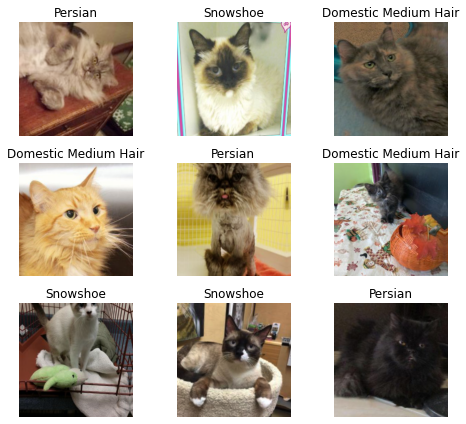

In [14]:
data.show_batch(rows=3, figsize=(7,6))

In [15]:
print(data.classes)
len(data.classes),data.c

['Domestic Medium Hair', 'Persian', 'Ragdoll', 'Siamese', 'Snowshoe']


(5, 5)

## Training: resnet34

Now we will start training our model. We will use a [convolutional neural network](http://cs231n.github.io/convolutional-networks/) backbone and a fully connected head with a single hidden layer as a classifier. Don't know what these things mean? Not to worry, we will dive deeper in the coming lessons. For the moment you need to know that we are building a model which will take images as input and will output the predicted probability for each of the categories (in this case, it will have 37 outputs).

We will train for 4 epochs (4 cycles through all our data).

In [16]:
learn = cnn_learner(data, models.resnet34, metrics=error_rate)

In [42]:
learn.model

Sequential(
  (0): Sequential(
    (0): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
    (1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU(inplace=True)
    (3): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
    (4): Sequential(
      (0): BasicBlock(
        (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
        (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (relu): ReLU(inplace=True)
        (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
        (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      )
      (1): BasicBlock(
        (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
        (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  

In [43]:
learn.fit_one_cycle(1)

epoch,train_loss,valid_loss,error_rate,time
0,0.926288,0.693370,0.248801,02:42


In [44]:
learn.unfreeze()

In [45]:
learn.lr_find()

epoch,train_loss,valid_loss,error_rate,time


LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


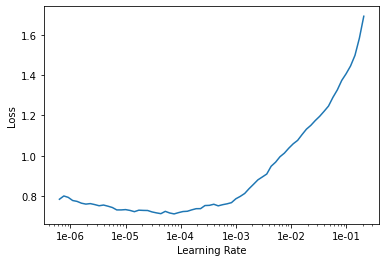

In [46]:
learn.recorder.plot()

In [47]:
learn.unfreeze()

In [48]:
learn.fit_one_cycle(4, max_lr=slice(1e-5,1e-4))

epoch,train_loss,valid_loss,error_rate,time
0,0.740312,0.632100,0.218525,03:07
1,0.625852,0.572686,0.192446,03:03
2,0.529255,0.556485,0.187650,03:07
3,0.483751,0.548236,0.189149,03:08


In [ ]:
# 0.130462

In [49]:
learn.save('version-3_stage-1')

In [50]:
learn.export()

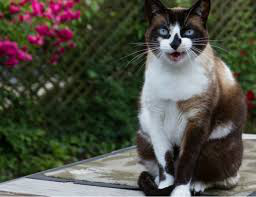

In [65]:
img = open_image('C:/Users/leero/Projects/cat-detector/inference/snowshoe2.jpg')
img

In [66]:
learn = load_learner(path)
pred_class,pred_idx,outputs = learn.predict(img)
i = pred_idx.item()
classes = learn.data.classes
classes[i]

'Snowshoe'

In [17]:
learn.load('version-3_stage-1')

Learner(data=ImageDataBunch;

Train: LabelList (13345 items)
x: ImageList
Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224)
y: CategoryList
Snowshoe,Snowshoe,Snowshoe,Snowshoe,Snowshoe
Path: C:\Users\leero\Projects\cat-detector\images;

Valid: LabelList (3336 items)
x: ImageList
Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224)
y: CategoryList
Domestic Medium Hair,Persian,Siamese,Ragdoll,Ragdoll
Path: C:\Users\leero\Projects\cat-detector\images;

Test: None, model=Sequential(
  (0): Sequential(
    (0): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
    (1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU(inplace=True)
    (3): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
    (4): Sequential(
      (0): BasicBlock(
        (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), pa

In [18]:
learn.fit_one_cycle(3, max_lr=slice(1e-5,1e-4))

epoch,train_loss,valid_loss,error_rate,time
0,0.485360,0.547464,0.190048,02:55
1,0.464902,0.548205,0.185851,02:47
2,0.475435,0.548451,0.185552,02:48


In [19]:
learn.save('version-3_stage-2')

In [20]:
learn.export()

In [38]:
img = open_image('C:/Users/leero/Projects/cat-detector/inference/domestic-medium-hair-cat3.jpg')
img

learn = load_learner(path)
pred_class,pred_idx,outputs = learn.predict(img)
i = pred_idx.item()
classes = learn.data.classes
classes[i]

'Domestic Medium Hair'

## Training: resnet50

Now we will train in the same way as before but with one caveat: instead of using resnet34 as our backbone we will use resnet50 (resnet34 is a 34 layer residual network while resnet50 has 50 layers. It will be explained later in the course and you can learn the details in the [resnet paper](https://arxiv.org/pdf/1512.03385.pdf)).

Basically, resnet50 usually performs better because it is a deeper network with more parameters. Let's see if we can achieve a higher performance here. To help it along, let's us use larger images too, since that way the network can see more detail. We reduce the batch size a bit since otherwise this larger network will require more GPU memory.

In [67]:
data = ImageDataBunch.from_lists(path, fnames, labels_ls, ds_tfms=get_transforms(), size=299,bs=16).normalize(imagenet_stats)

In [68]:
learn = cnn_learner(data, models.resnet50, metrics=error_rate)

In [69]:
learn.fit_one_cycle(1)

epoch,train_loss,valid_loss,error_rate,time
0,0.761445,0.601559,0.213429,06:02


epoch,train_loss,valid_loss,error_rate,time


LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


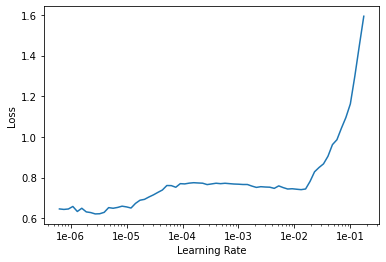

In [70]:
learn.lr_find()
learn.recorder.plot()

In [71]:
learn.unfreeze()
learn.fit_one_cycle(3, max_lr=slice(1e-6,1e-15))

epoch,train_loss,valid_loss,error_rate,time
0,0.725545,0.610708,0.209233,07:43
1,0.761770,0.615392,0.208333,07:46
2,0.731460,0.601146,0.206235,07:39


In [72]:
learn.save('version-3_stage-1-resnet50')

## Testing inference

In [12]:
source = "export.pkl"
state = torch.load(source, map_location='cpu') if defaults.device == torch.device('cpu') else torch.load(source)

In [16]:
state = load_learner(path = ".")

In [17]:
img = open_image('C:/Users/leero/Projects/cat-detector/inference/domestic-medium-hair-cat3.jpg')


#learn = load_learner(path)
pred_class,pred_idx,outputs = state.predict(img)
i = pred_idx.item()
classes = ['Domestic Medium Hair', 'Persian', 'Ragdoll', 'Siamese', 'Snowshoe']
classes[i]

'Domestic Medium Hair'